In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
#(train_X, train_y), (test_X, test_Y) = imdb.load_data(num_words=10000)

#The above line of code does not seem to be working. So I had to do the below code to load the imdb data.

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_X, train_y), (test_X, test_Y) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [4]:
#Each review (row) is of different size. This data needs to be made uniform. 
# i.e. each reviuew (i.e. row) needs to be onehotencoded to a length of 10,000 (we have decided to have only 10000 features)

def OneHotEncoding_fn(IMDBData, dimension=10000):
    #25k x 10k matrix of zeros
    OneHotEncoded_Data = np.zeros((len(IMDBData), dimension)) 
    for i, sequence in enumerate(IMDBData):
        #Selectively make indices as 1 based on availability of word in the review.
        OneHotEncoded_Data[i, sequence] = 1.
    return OneHotEncoded_Data
print(train_X[0])

x_train = OneHotEncoding_fn(train_X)
x_test = OneHotEncoding_fn(test_X)
y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_Y).astype('float32')

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
#create the layers
from keras import models
from keras import layers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dropout(0.55, input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.55))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


#model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9),
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False),  #Momentum
#model.compile(optimizer=optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=True),   #Nesterov
#model.compile(optimizer=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),              #Adagrad
model.compile(optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), #Adam
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

history = model.fit(X_train_without_val,
                    y_train_without_val,
                    epochs=25,
                    batch_size=512,
                    validation_data=(X_validation,y_validation))


Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 19s 971us/step - loss: 0.6416 - binary_accuracy: 0.6317 - val_loss: 0.4724 - val_binary_accuracy: 0.8338
Epoch 2/25
20000/20000 [==============================] - 9s 451us/step - loss: 0.4695 - binary_accuracy: 0.7884 - val_loss: 0.3306 - val_binary_accuracy: 0.8734
Epoch 3/25
20000/20000 [==============================] - 8s 388us/step - loss: 0.3987 - binary_accuracy: 0.8312 - val_loss: 0.3063 - val_binary_accuracy: 0.8806
Epoch 4/25
20000/20000 [==============================] - 8s 379us/step - loss: 0.3580 - binary_accuracy: 0.8487 - val_loss: 0.2818 - val_binary_accuracy: 0.8860
Epoch 5/25
20000/20000 [==============================] - 8s 389us/step - loss: 0.3447 - binary_accuracy: 0.8562 - val_loss: 0.2793 - val_binary_accuracy: 0.8908
Epoch 6/25
20000/20000 [==============================] - 7s 369us/step - loss: 0.3265 - bin

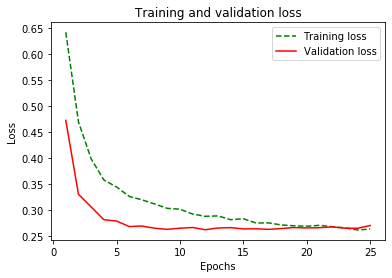

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


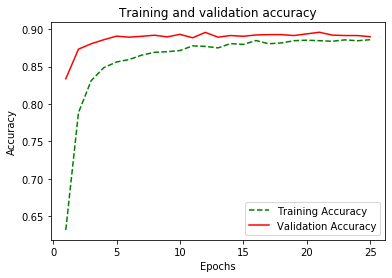

In [8]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()